# PURCHASE HISTORY

In [2]:
import glob
import polars as pl

dfs = []
for path in glob.glob("/kaggle/input/recommendation-dataset/sales_pers.purchase_history_daily_chunk_*.parquet"):
    df_chunk = pl.read_parquet(path)
    dfs.append(df_chunk)

history_df = pl.concat(dfs)

In [2]:
history_df.describe()

statistic,timestamp,user_id,item_id,event_type,event_value,price,date_key,quantity,customer_id,created_date,updated_date,channel,payment,location,discount,is_deleted
str,f64,str,str,str,f64,f64,f64,f64,f64,str,str,str,str,f64,f64,f64
"""count""",3.5729825e7,"""35729825""","""35729825""","""35729825""",3.5729825e7,3.5729825e7,3.5729825e7,3.5729825e7,3.5729825e7,"""35729825""","""35729825""","""35729825""","""35729825""",3.5729825e7,3.5729825e7,3.5729825e7
"""null_count""",0.0,"""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""",0.0,0.0,0.0
"""mean""",1.7199e9,null,null,null,1.508098,169188.742494,2.0241e7,1.508098,4.8713e6,"""2024-07-02 17:13:24.220955""","""2024-07-02 18:27:59.561504""",null,null,448.414508,17235.651914,0.0
"""std""",9.1568e6,null,null,null,2.264976,195539.88976,346.231465,2.264976,2.2697e6,null,null,null,null,247.505432,46673.708499,null
"""min""",1.7041e9,"""0000063a29e92d643437aa09266fdc…","""0000280000019""","""Purchase""",1.0,0.0444,2.0240101e7,1.0,14732.0,"""2024-01-01 06:44:59.037000""","""2024-01-01 06:44:59.233000""","""Android""","""Chuyển khoản""",16.0,0.0,0.0
"""25%""",1.7120e9,null,null,null,1.0,48316.3914,2.0240401e7,1.0,3.06641e6,"""2024-04-01 16:44:10.513000""","""2024-04-01 17:15:12.017000""",null,null,234.0,0.0,null
"""50%""",1.7199e9,null,null,null,1.0,87000.0,2.0240702e7,1.0,5.373736e6,"""2024-07-02 19:06:52.293000""","""2024-07-02 19:42:24.550000""",null,null,439.0,0.0,null
"""75%""",1.7279e9,null,null,null,1.0,244000.0,2.0241002e7,1.0,6.853734e6,"""2024-10-02 19:55:22.447000""","""2024-10-02 20:24:53.813000""",null,null,653.0,15000.0,null
"""max""",1.7357e9,"""fffff7e197ebf5c523fa686e6a305c…","""7352000000004""","""Purchase""",240.0,2.099e7,2.0241231e7,240.0,8.208027e6,"""2024-12-31 22:35:19.510000""","""2025-09-27 21:25:22.960000""","""iOS""","""ZaloPay""",1036.0,7.995e6,0.0


- Biến price: Trung bình khoảng 169,188 VND, độ lệch chuẩn cao (~195,000), giá dao động mạnh từ 0.04 → 2.1×10⁷, cho thấy có nhiều nhóm sản phẩm khác biệt về giá.
- Biến quantity: Phần lớn bằng 1, 25%–75% đều bằng 1 → chỉ có rất ít giao dịch mua nhiều sản phẩm.
- Biến discount: Trung bình ~17,235 VND, nhưng lệch chuẩn lớn (46,000+) → chỉ một phần nhỏ đơn hàng được giảm giá mạnh.
- Biến location: Biểu diễn tọa độ hoặc ID cửa hàng; có thể dùng để nhóm theo khu vực, nhưng không mang giá trị định lượng rõ ràng.
- Biến event_value: Trung bình ~1.5 (min=1, max=240) → có thể là số lượng.
- event_type: Chỉ có giá trị "Purchase" → tập trung vào giao dịch đã mua, không có hành vi khác như “View” hay “AddToCart”, không có giá trị phân biệt.
- channel: Có các giá trị như "Android", "iOS" → đa nền tảng, nhưng cần kiểm tra tần suất từng loại.
- payment: Gồm "Chuyển khoản", "ZaloPay", ... → có thể khai thác để phân tích xu hướng thanh toán điện tử.
- is_deleted: Gần như toàn bộ = 0 → dữ liệu đã được lọc các bản ghi hợp lệ, không có sự biến thiên

In [6]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

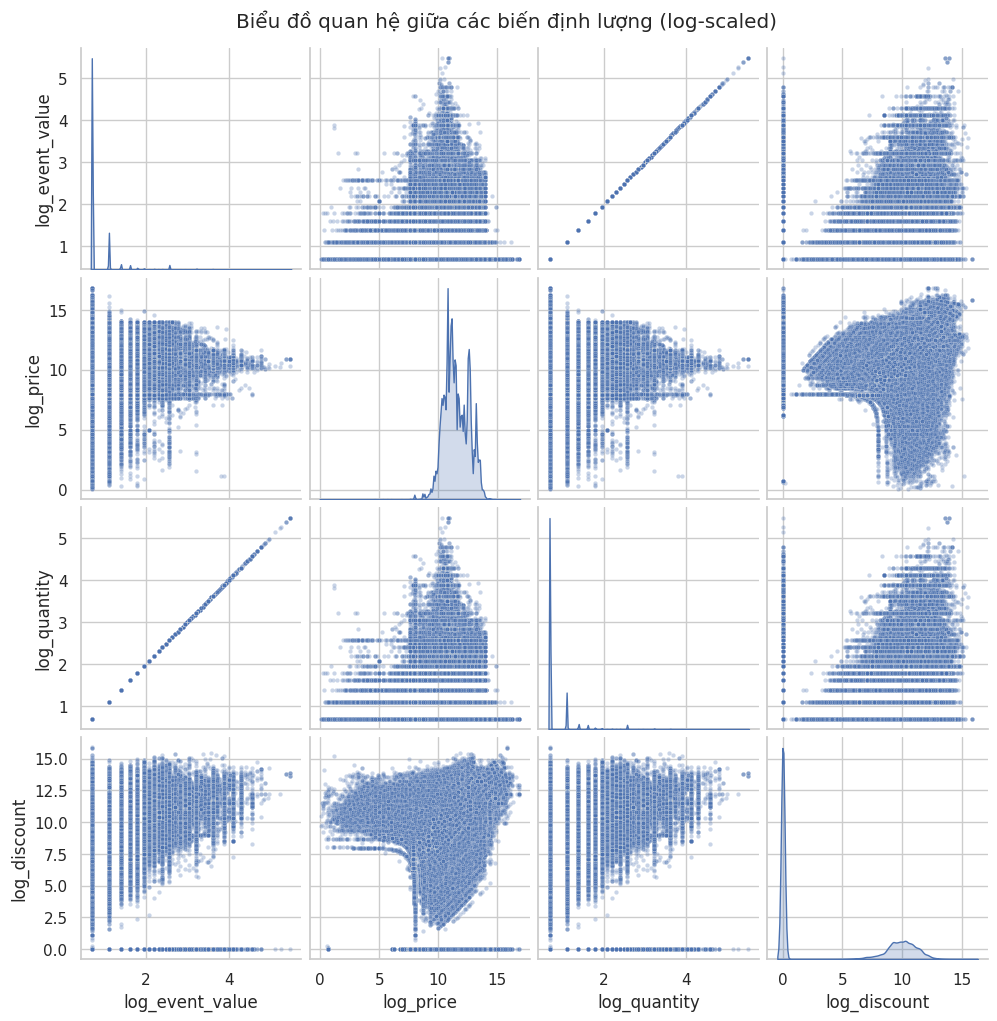

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import polars as pl

numeric_cols = ["event_value", "price", "quantity", "discount"]

df = (
    history_df
    .select([pl.col(c).cast(pl.Float64) for c in numeric_cols])
    .drop_nulls()
    .to_pandas()
)

for col in numeric_cols:
    df[f"log_{col}"] = np.log1p(df[col])

sns.set(style="whitegrid", font="Inter")
g = sns.pairplot(
    df[[f"log_{c}" for c in numeric_cols]],
    diag_kind="kde",
    plot_kws={"alpha": 0.3, "s": 10}
)
g.fig.suptitle("Biểu đồ quan hệ giữa các biến định lượng (log-scaled)", y=1.02)
plt.show()

Trong đường chéo chính:
- log_event_value: Phân phối lệch phải, tập trung quanh 1–2 → đa phần sự kiện chỉ có giá trị nhỏ (event_value ≈ 1).
- log_price: Phân phối khá rộng (5–12), đỉnh tập trung quanh log(giá) ≈ 10 (~22,000–25,000 VND), cho thấy giá sản phẩm rất đa dạng.
- log_quantity: Phân phối dốc và lệch phải, hầu hết bằng 1 → xác nhận phần lớn khách hàng chỉ mua một sản phẩm mỗi đơn hàng.
- log_discount: Có 2 cụm rõ ràng: một cụm gần 0 (không giảm giá) và một cụm tầm 10 (~20,000–25,000 VND), phản ánh chính sách giảm giá theo nhóm sản phẩm.
  
Ở ngoài đường chéo chính:
- log_event_value ↔ log_quantity: Có quan hệ gần như tuyến tính, vì event_value thường tỉ lệ thuận với số lượng mua → xác nhận logic "event_value ≈ số lượng hoặc tổng sản phẩm".
- log_price ↔ log_discount: Có xu hướng tương quan dương yếu → các sản phẩm giá cao thường được giảm nhiều tiền tuyệt đối, nhưng tỷ lệ giảm giá (%) có thể không lớn.
- log_price ↔ log_quantity: Có phân tán ngược chiều nhẹ — khi giá tăng, số lượng có xu hướng giảm → biểu hiện hiệu ứng giá (price elasticity).
- log_event_value ↔ log_price: Dạng phân tán không tuyến tính, có thể do sản phẩm có nhiều mức giá nhưng event_value không đổi (do event_value không phải doanh thu mà là trọng số sự kiện).
- log_discount ↔ log_quantity: Mối quan hệ khá yếu → chiết khấu không ảnh hưởng mạnh đến số lượng mua trong dữ liệu này.

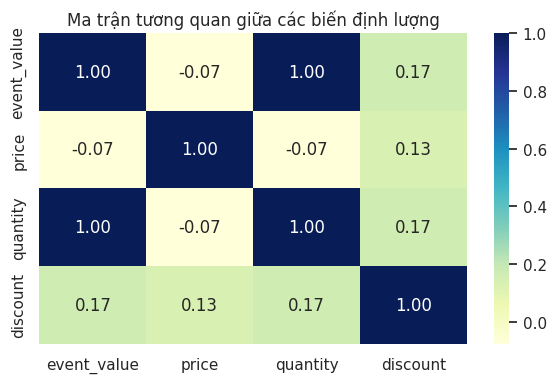

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_cols = ["event_value", "price", "quantity", "discount"]
corr = df[numeric_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Ma trận tương quan giữa các biến định lượng", fontsize=12)
plt.tight_layout()
plt.show()

- event_value ↔ quantity: Tương quan tuyệt đối, gần như tuyến tính hoàn toàn. → Hai biến này có thể biểu diễn cùng một thông tin (event_value ≈ quantity).
- price ↔ discount: Tương quan dương yếu → sản phẩm có giá cao hơn thường có chiết khấu tuyệt đối cao hơn, nhưng không tuyến tính mạnh.
- event_value ↔ discount: Dương rất yếu → số lượng mua và mức chiết khấu không liên hệ chặt, có thể do khuyến mãi không phụ thuộc vào số lượng.
- price ↔ event_value / price ↔ quantity: Tương quan âm rất yếu → giá không ảnh hưởng nhiều đến số lượng mua trong tập dữ liệu này.

Kết luận:
- Quan hệ mạnh nhất: event_value và quantity (r ≈ 1.0) → trùng thông tin, nên chỉ giữ một trong hai để tránh đa cộng tuyến trong mô hình.
- Các cặp còn lại: có tương quan rất yếu (|r| < 0.2), cho thấy các biến khá độc lập, điều này có lợi cho mô hình học máy vì không gây dư thừa thông tin.
- Không có tương quan âm mạnh → không tồn tại mối quan hệ nghịch mạnh giữa các biến định lượng chính.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


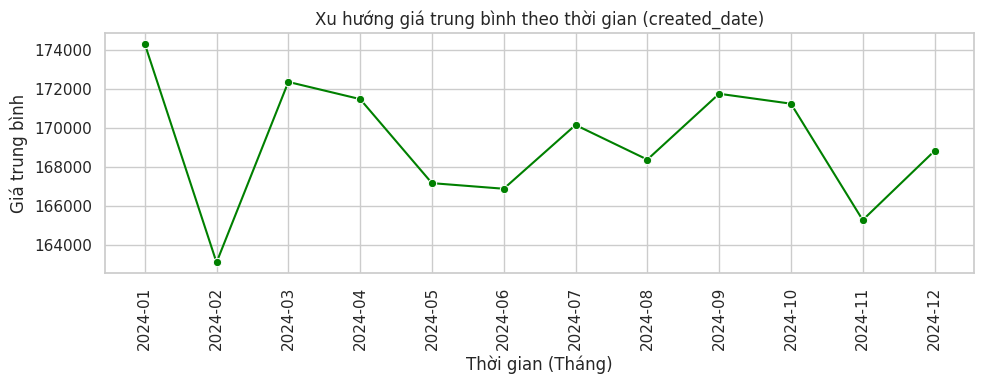

In [17]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

df_time = (
    history_df
    .select([
        pl.col("created_date"),                      
        pl.col("price").cast(pl.Float64)              
    ])
    .drop_nulls()
    .to_pandas()
)

df_time["month"] = df_time["created_date"].dt.to_period("M").astype(str)
price_by_month = df_time.groupby("month")["price"].mean().reset_index()

plt.figure(figsize=(10,4))
sns.lineplot(data=price_by_month, x="month", y="price", marker="o", color="green")
plt.xticks(rotation=90)
plt.title("Xu hướng giá trung bình theo thời gian (created_date)")
plt.xlabel("Thời gian (Tháng)")
plt.ylabel("Giá trung bình")
plt.tight_layout()
plt.show()

- Dữ liệu trải dài trong năm 2024, cho phép xem biến động ngắn hạn theo tháng.
- Giá trung bình dao động quanh 165.000 – 174.000, không có biến động quá mạnh, thể hiện sự ổn định tương đối của giá sản phẩm.
- Có một vài đỉnh tăng nhẹ vào các tháng:
- 2024-01 và 2024-04: mức giá trung bình cao nhất (~174.000 VND).
- 2024-11: ghi nhận mức giá trung bình thấp nhất (~164.000 VND), có thể trùng với mùa giảm giá hoặc chương trình khuyến mãi.
- Sự dao động giá giữa các tháng cho thấy chu kỳ ngắn hạn hoặc tác động mùa vụ — ví dụ, sau các đợt giảm giá, giá trung bình có xu hướng phục hồi trở lại.

# ITEMS

In [4]:
dfs = []
for path in glob.glob("/kaggle/input/recommendation-dataset/sales_pers.item_chunk_*.parquet"):
    df_chunk = pl.read_parquet(path)
    dfs.append(df_chunk)

item_df = pl.concat(dfs)

In [4]:
item_df.describe()

statistic,p_id,item_id,price,category_l1_id,category_l1,category_l2_id,category_l2,category_l3_id,category_l3,category_id,category,description,brand,manufacturer,creation_timestamp,is_deleted,created_date,updated_date,sync_status_id,last_sync_date,sync_error_message,image_url,gender_target,age_group,item_type,gp,weight,color,size,origin,volume,material,sale_status,description_new
str,f64,str,f64,f64,str,f64,str,f64,str,f64,str,str,str,str,f64,f64,str,str,f64,str,str,str,str,str,str,f64,f64,str,str,str,str,str,f64,str
"""count""",27332.0,"""27332""",27332.0,27332.0,"""27332""",27332.0,"""27332""",27332.0,"""27332""",27332.0,"""27332""","""27332""","""27332""","""27332""",27332.0,27332.0,"""27332""","""27332""",26546.0,"""26546""","""0""","""27332""","""27332""","""27332""","""27332""",27332.0,0.0,"""27332""","""27332""","""27332""","""27332""","""27332""",27332.0,"""22317"""
"""null_count""",0.0,"""0""",0.0,0.0,"""0""",0.0,"""0""",0.0,"""0""",0.0,"""0""","""0""","""0""","""0""",0.0,0.0,"""0""","""0""",786.0,"""786""","""27332""","""0""","""0""","""0""","""0""",0.0,27332.0,"""0""","""0""","""0""","""0""","""0""",0.0,"""5015"""
"""mean""",106317.679643,null,190456.829467,2836.189192,null,3719.039843,null,4876.768294,null,4920.712718,null,null,null,null,1.6225e9,0.0,"""2021-05-31 17:17:33.849833""","""2025-08-30 04:07:07.766157""",2.0,"""2025-07-18 18:00:25.086391""",null,null,null,null,null,49696.651226,null,null,null,null,null,null,0.167203,null
"""std""",25425.734073,null,511123.971813,1417.521137,null,1935.042044,null,2035.952741,null,1999.308355,null,null,null,null,7.5666e7,null,null,null,0.0,null,null,null,null,null,null,144155.68753,null,null,null,null,null,null,0.373164,null
"""min""",1675.0,"""0000280000019""",0.0,1.0,"""Babycare""",2.0,"""0-1Y""",14.0,"""A2 milk""",4.0,"""0-12M Bodysuit bé trai đùi""","""Với kiểu dáng đơn giản nhưng …","""137 Degrees""","""(L) Địa điểm kinh doanh 1 - Ch…",1.2983e9,0.0,"""2011-02-21 11:54:02.047000""","""2023-12-26 17:21:11.663000""",2.0,"""2025-07-18 17:59:29.898256""",null,"""Không xác định""","""Bé Gái""","""0-10M""","""BCS""",0.0,null,"""Bạc""","""0 tháng""",""" Singapore, Thụy Sĩ""","""1 lít""",""" Vải không dệt, bông cellulose…",0.0,"""Chi tiết sản phẩm …"
"""25%""",88905.0,null,49000.0,2788.0,null,2038.0,null,3516.0,null,3522.0,null,null,null,null,1.5755e9,null,"""2019-12-04 18:24:16.260000""","""2025-08-18 09:59:19.847000""",2.0,"""2025-07-18 17:59:29.898256""",null,null,null,null,null,0.0,null,null,null,null,null,null,0.0,null
"""50%""",104510.0,null,119000.0,3292.0,null,3958.0,null,5254.0,null,5511.0,null,null,null,null,1.6358e9,null,"""2021-11-01 13:19:26.080000""","""2025-09-26 08:05:23.153000""",2.0,"""2025-07-18 17:59:29.898256""",null,null,null,null,null,25047.0,null,null,null,null,null,null,0.0,null
"""75%""",120262.0,null,199000.0,3292.0,null,4571.0,null,6984.0,null,6988.0,null,null,null,null,1.6699e9,null,"""2022-12-01 15:40:42.260000""","""2025-09-27 00:05:36.233000""",2.0,"""2025-07-18 17:59:29.898256""",null,null,null,null,null,65532.0,null,null,null,null,null,null,0.0,null
"""max""",167147.0,"""7497000000006""",2.099e7,7376.0,"""Đồ chơi & Sách""",7492.0,"""Đồ uống""",7493.0,"""Đồ hộp""",7501.0,"""Động vật mô hình""","""﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿﻿Bỉm …","""Đức Thành""","""﻿Shantou City Chenghai Jia Ron…",1.7559e9,0.0,"""2025-08-22 17:35:14.377000""","""2025-10-01 08:05:42.990000""",2.0,"""2025-07-21 10:59:04.045058""",null,"""Không xác định""","""Unisex""","""[""Từ 6M"", ""Từ 9M"", ""Từ 1Y""]""","""Ứng dụng mẹ và bé""",5.54136e6,null,"""Đỏ""","""XXL(15-25kg) - 26 miếng""","""Ấn Độ, Bulgaria""","""hộp 3 lọ x 250ml""","""﻿100% cotton﻿<br>""",1.0,"""Xin lỗi, nhưng tôi không thể t…"


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


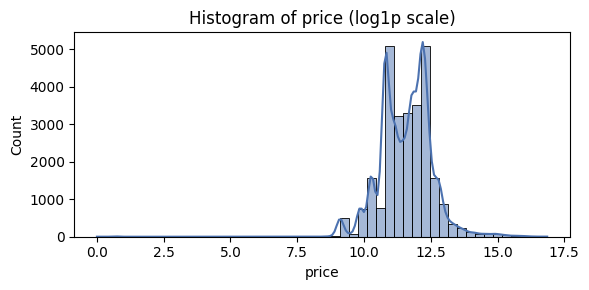

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


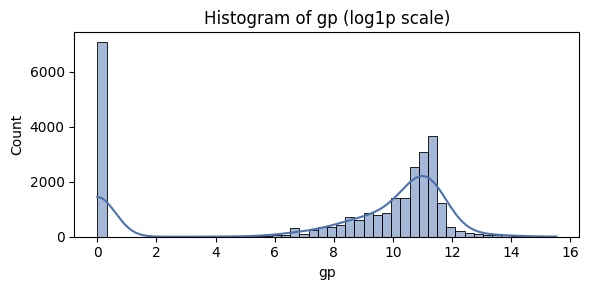

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl

numeric_cols = ["price", "gp"]

for col in numeric_cols:
    df = (
        item_df
        .select(pl.col(col).cast(pl.Float64))   
        .filter(pl.col(col).is_not_null())
        .to_pandas()
    )

    plt.figure(figsize=(6,3))
    sns.histplot(np.log1p(df[col].astype(float)), bins=50, kde=True, color="#4C72B0")
    plt.title(f"Histogram of {col} (log1p scale)")
    plt.tight_layout()
    plt.show()

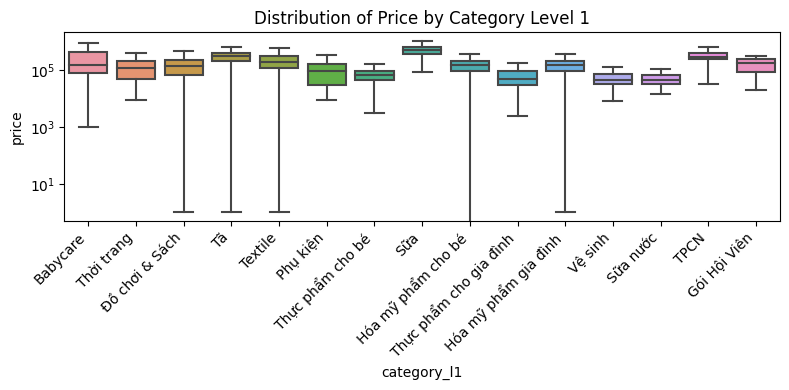

In [11]:
df = (
    item_df
    .select([
        pl.col("category_l1"),
        pl.col("price").cast(pl.Float64, strict=False)  
    ])
    .filter(pl.col("price").is_not_null())
    .to_pandas()
)

plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="category_l1", y="price", showfliers=False)
plt.yscale("log")
plt.title("Distribution of Price by Category Level 1")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


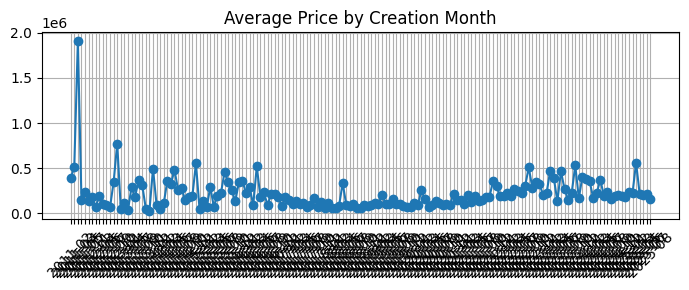

In [14]:
df_time = (
    item_df
    .with_columns(
        pl.col("created_date")
        .cast(pl.Utf8)                  
        .str.slice(0, 7)
        .alias("month")
    )
    .group_by("month")
    .agg(pl.col("price").cast(pl.Float64, strict=False).mean().alias("avg_price"))
    .sort("month")
    .drop_nulls()
    .to_pandas()
)

plt.figure(figsize=(7,3))
plt.plot(df_time["month"], df_time["avg_price"], marker="o")
plt.title("Average Price by Creation Month")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


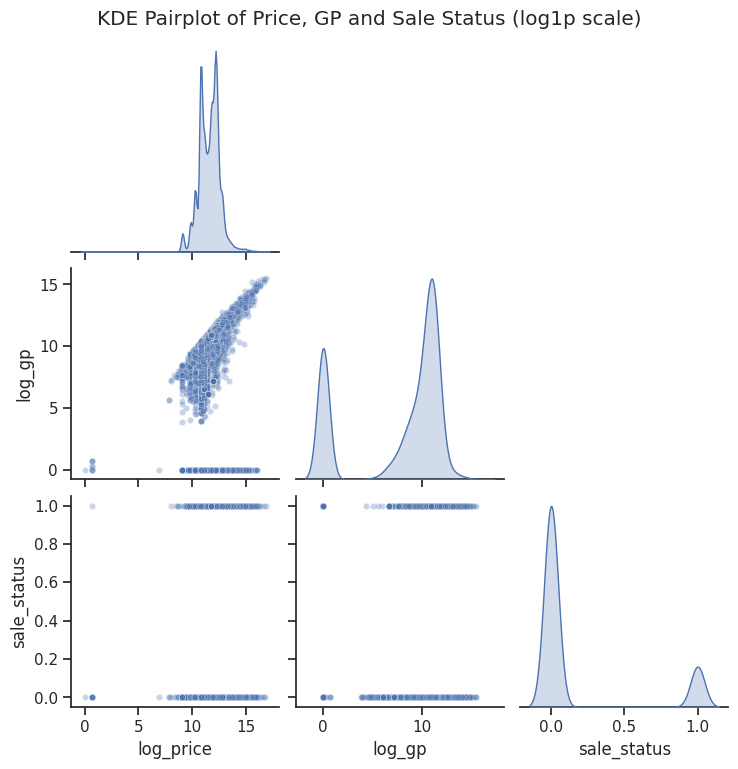

In [16]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- chọn cột định lượng có ý nghĩa ---
num_cols = ["price", "gp", "sale_status"]

# --- đảm bảo tất cả là float ---
df_pair = (
    item_df
    .select([pl.col(c).cast(pl.Float64, strict=False).alias(c) for c in num_cols])
    .drop_nulls(subset=["price", "gp"])   # chỉ cần 2 cột chính có giá trị
    .to_pandas()
    .astype(float)
)

# --- log-transform nhẹ để tránh skew ---
for c in ["price", "gp"]:
    df_pair[f"log_{c}"] = np.log1p(df_pair[c])

# --- vẽ pairplot KDE ---
sns.set(style="ticks", color_codes=True)

sns.pairplot(
    df_pair,
    vars=["log_price", "log_gp", "sale_status"],
    diag_kind="kde",       # KDE cho biểu đồ chéo
    corner=True,           # chỉ hiển thị nửa dưới
    plot_kws=dict(alpha=0.3, s=20)
)
plt.suptitle("KDE Pairplot of Price, GP and Sale Status (log1p scale)", y=1.02)
plt.show()


Biểu đồ KDE Pairplot cho thấy mối tương quan dương mạnh giữa giá sản phẩm (price) và lợi nhuận gộp (gp). Phân bố cả hai biến đều lệch phải, tập trung vào vùng giá và lợi nhuận thấp. Biến sale_status thể hiện sự mất cân bằng rõ rệt (đa số sản phẩm đã ngừng bán), đồng thời các sản phẩm đang bán chủ yếu nằm trong khoảng giá và lợi nhuận trung bình đến cao. Kết quả này gợi ý rằng chiến lược sản phẩm hiện tại ưu tiên các mặt hàng có biên lợi nhuận tương đối tốt.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

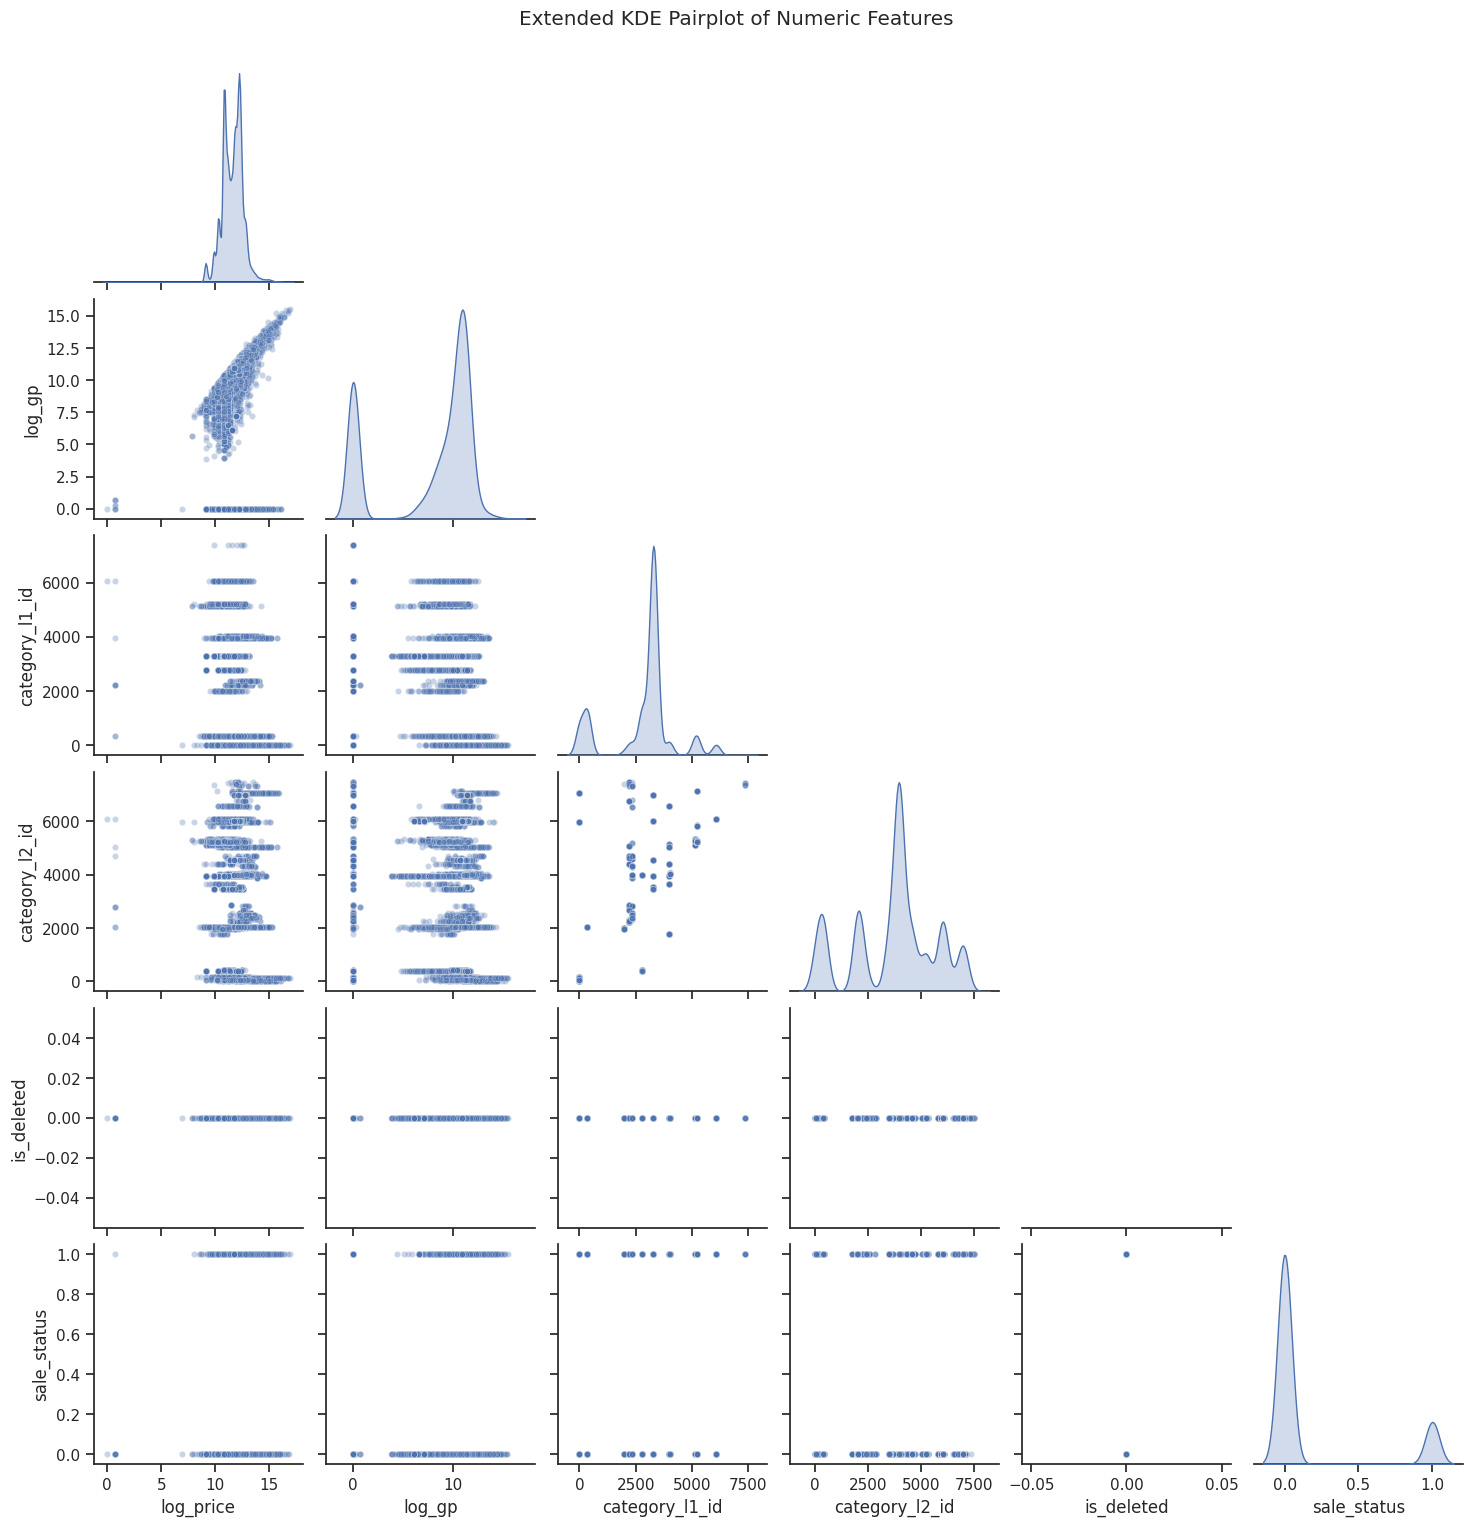

In [17]:
num_cols = [
    "price", "gp", 
    "category_l1_id", "category_l2_id", "category_l3_id",
    "is_deleted", "sync_status_id", "sale_status"
]

df_pair = (
    item_df
    .select([pl.col(c).cast(pl.Float64, strict=False).alias(c) for c in num_cols])
    .drop_nulls(["price", "gp"])
    .to_pandas()
)

# Log-transform cho giá và gp
df_pair["log_price"] = np.log1p(df_pair["price"])
df_pair["log_gp"] = np.log1p(df_pair["gp"])

sns.pairplot(
    df_pair,
    vars=["log_price", "log_gp", "category_l1_id", "category_l2_id", "is_deleted", "sale_status"],
    diag_kind="kde",
    corner=True,
    plot_kws=dict(alpha=0.3, s=20)
)
plt.suptitle("Extended KDE Pairplot of Numeric Features", y=1.02)
plt.show()


Biểu đồ KDE Pairplot mở rộng cho thấy mối tương quan tuyến tính rõ rệt giữa giá (price) và lợi nhuận gộp (gp), trong khi các biến danh mục (category_l1_id, category_l2_id) thể hiện các cụm rời rạc tương ứng với từng nhóm sản phẩm. Hai biến trạng thái (is_deleted, sale_status) chủ yếu tập trung ở một giá trị, cho thấy sự mất cân bằng lớp đáng kể. Các phân bố lệch phải của giá và lợi nhuận gợi ý nên áp dụng log-transform khi mô hình hóa. Nhìn chung, cấu trúc đa biến của bộ dữ liệu bị chi phối mạnh bởi yếu tố giá và nhóm danh mục sản phẩm.

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


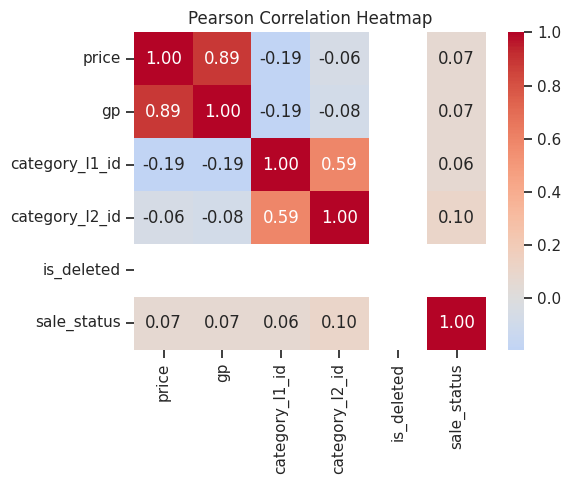

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ["price", "gp", "category_l1_id", "category_l2_id", "is_deleted", "sale_status"]
df_corr = item_df.select([pl.col(c).cast(pl.Float64, strict=False) for c in num_cols]).to_pandas()

corr = df_corr.corr(method="pearson")
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Pearson Correlation Heatmap")
plt.tight_layout()
plt.show()

- Hai biến “kinh tế” (price, gp) gần như tương đương nhau.
→ Trong mô hình dự đoán, chỉ nên giữ một trong hai hoặc tạo biến mới profit_margin = gp / price để biểu diễn tỷ suất lợi nhuận tương đối, tránh trùng thông tin.
- Hai biến danh mục (category_l1_id, category_l2_id) có liên hệ cấu trúc.
→ Không nên đồng thời giữ cả hai dưới dạng numeric; nên chuyển sang dạng phân loại (category_l1, category_l2) và mã hóa one-hot hoặc target encoding.
- Cột is_deleted không có thông tin hữu ích.
→ Nên loại bỏ khỏi feature set hoặc chỉ dùng trong phân tích metadata, vì không đóng góp vào dự đoán.

# USERS

In [3]:
dfs = []
for path in glob.glob("/kaggle/input/recommendation-dataset/sales_pers.user_chunk_*.parquet"):
    df_chunk = pl.read_parquet(path)
    dfs.append(df_chunk)

user_df = pl.concat(dfs)

In [20]:
user_df.describe()

statistic,customer_id,gender,location,province,membership,timestamp,created_date,updated_date,sync_status_id,last_sync_date,sync_error_message,region,location_name,install_app,install_date,district,user_id,is_deleted
str,f64,str,f64,str,str,f64,str,str,f64,str,str,str,str,str,f64,str,str,f64
"""count""",4.573964e6,"""4573964""",4.573964e6,"""4573964""","""4573964""",4.573964e6,"""4573964""","""4573964""",4.235679e6,"""4235679""","""0""","""4573964""","""4573964""","""4573964""",4.573964e6,"""4573964""","""4573964""",4.573964e6
"""null_count""",0.0,"""0""",0.0,"""0""","""0""",0.0,"""0""","""0""",338285.0,"""338285""","""4573964""","""0""","""0""","""0""",0.0,"""0""","""0""",0.0
"""mean""",6.1266e6,null,554.053518,null,null,1.6712e9,"""2022-12-16 22:48:44.025646""","""2025-06-11 05:52:40.770554""",2.0,"""2025-07-16 15:20:34.188640""",null,null,null,null,1.6841e9,null,null,0.0
"""std""",2.4412e6,null,295.523361,null,null,7.9743e7,null,null,0.0,null,null,null,null,null,7.1374e7,null,null,null
"""min""",14732.0,"""Khác""",42.0,"""An Giang""","""Diamond""",1.3064e9,"""2011-05-25 21:11:51.677000""","""2019-06-30 08:38:47.100000""",2.0,"""2025-07-16 11:54:29.816986""",null,"""Bắc Trung Bộ""","""AGI - 110 Quốc Lộ 91""","""Android""",1.3063e9,""" Vũng Liêm""","""000004697bc1f0ecab42b6a3c2f0bc…",0.0
"""25%""",4.53268e6,null,302.0,null,null,1.6343e9,"""2021-10-15 10:09:34.280000""","""2025-07-07 15:33:10.201316""",2.0,"""2025-07-16 11:58:58.022193""",null,null,null,null,1.6550e9,null,null,null
"""50%""",6.843955e6,null,547.0,null,null,1.6960e9,"""2023-09-29 16:33:25.217000""","""2025-07-07 15:33:10.201316""",2.0,"""2025-07-16 12:03:34.550186""",null,null,null,null,1.7054e9,null,null,null
"""75%""",8.029649e6,null,765.0,null,null,1.7312e9,"""2024-11-09 14:38:22.223000""","""2025-08-02 10:54:03.860000""",2.0,"""2025-07-16 12:11:53.888687""",null,null,null,null,1.7366e9,null,null,null
"""max""",9.264159e6,"""Nữ""",1310.0,"""Đồng Tháp""","""Standard""",1.7593e9,"""2025-09-30 22:00:36.623000""","""2025-09-30 23:22:08.957000""",2.0,"""2025-07-21 11:19:29.058389""",null,"""Đồng bằng sông Cửu Long""","""ĐTH - Trần Hưng Đạo""","""iOS""",1.7592e9,"""Ứng Hòa""","""fffffbd469d500229dd000e9fc48ed…",0.0


In [21]:
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cols = ["gender", "membership", "install_app", "region", "created_date"]
df_user = (
    user_df
    .select(cols)
    .drop_nulls()
    .to_pandas()
)

df_user["created_date"] = pd.to_datetime(df_user["created_date"], errors="coerce")
df_user["month"] = df_user["created_date"].dt.to_period("M").astype(str)

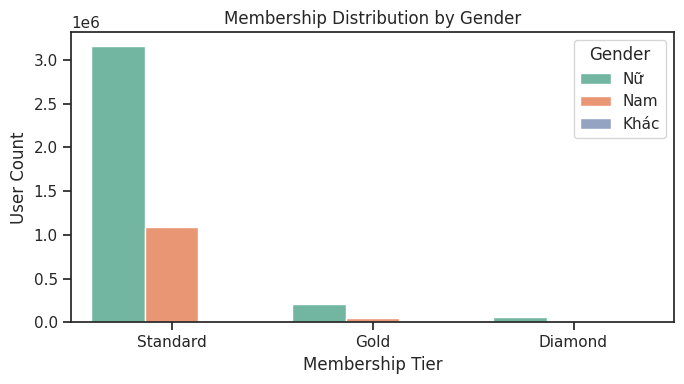

In [22]:
plt.figure(figsize=(7,4))
sns.countplot(
    data=df_user,
    x="membership",
    hue="gender",
    order=df_user["membership"].value_counts().index,
    palette="Set2"
)
plt.title("Membership Distribution by Gender")
plt.xlabel("Membership Tier")
plt.ylabel("User Count")
plt.legend(title="Gender", loc="upper right")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


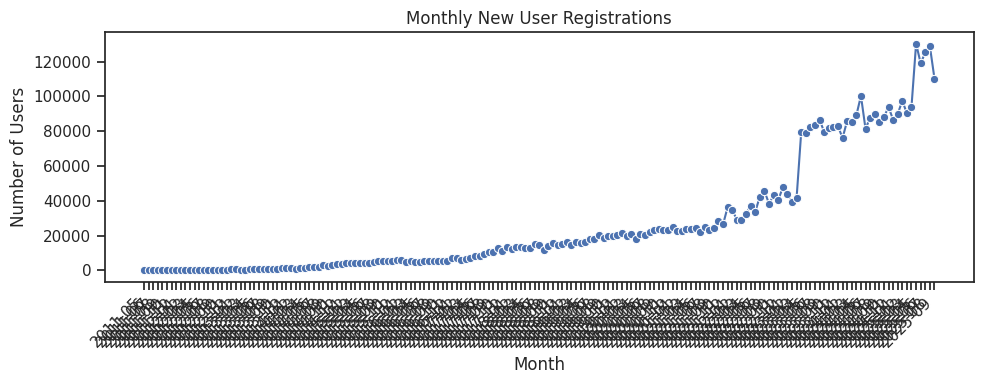

In [24]:
user_time = (
    df_user
    .groupby("month")["gender"]
    .count()
    .reset_index()
    .rename(columns={"gender": "user_count"})
)

plt.figure(figsize=(10,4))
sns.lineplot(data=user_time, x="month", y="user_count", marker="o", color="#4C72B0")
plt.title("Monthly New User Registrations")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Month")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()

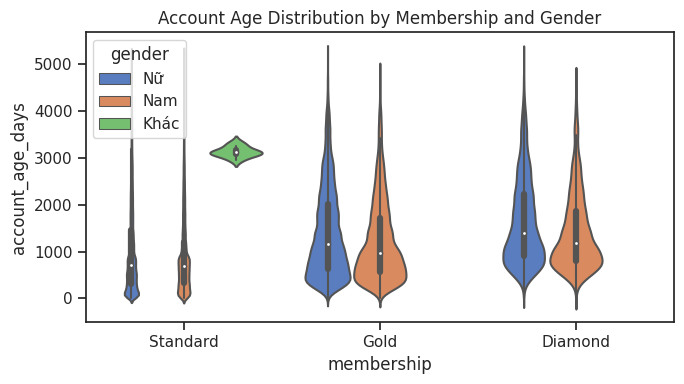

In [26]:
plt.figure(figsize=(7,4))
sns.violinplot(
    data=df_user,
    x="membership",
    y="account_age_days",
    hue="gender",
    palette="muted"
)
plt.title("Account Age Distribution by Membership and Gender")
plt.tight_layout()
plt.show()

# MERGE 

In [6]:
import polars as pl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

history_sample = (
    history_df
    .sample(n=100000, shuffle=True, seed=42)
    .select([
        pl.col("customer_id"),
        pl.col("item_id"),
        pl.col("price").cast(pl.Float64),
        pl.col("quantity").cast(pl.Float64),
        pl.col("date_key"),
    ])
    .with_columns((pl.col("price") * pl.col("quantity")).alias("total_value"))
)

user_info = user_df.select([
    "customer_id", "gender", "membership", "region", "install_app"
])

item_info = item_df.select([
    "item_id", "category_l1", "category_l2", "brand", "gp", "sale_status"
]).with_columns([
    pl.col("gp").cast(pl.Float64),
    pl.col("sale_status").cast(pl.Float64)
])

merged = (
    history_sample
    .join(user_info, on="customer_id", how="inner")
    .join(item_info, on="item_id", how="inner")
)

df_merged_full = merged.to_pandas()
df_merged_full = df_merged_full.astype({
    "price": "float64",
    "quantity": "float64",
    "gp": "float64",
    "total_value": "float64"
})

print(df_merged_full.shape)
df_merged_full.head()

(100000, 15)


,customer_id,item_id,price,quantity,date_key,total_value,gender,membership,region,install_app,category_l1,category_l2,brand,gp,sale_status
0,7437669,0020010000438,529000.0000,1.0,20240429,529000.0000,Nam,Standard,Duyên hải Nam Trung Bộ,In-Store,Sữa,Meiji,Meiji Nhập khẩu,111090.0,1.0
1,7437690,4690000000001,29666.6667,3.0,20240914,89000.0001,Nam,Gold,Đồng bằng sông Cửu Long,In-Store,Vệ sinh,Khăn ướt,Animo,14021.0,1.0
2,7438148,6792000000004,129000.0000,1.0,20241021,129000.0000,Nữ,Standard,Duyên hải Nam Trung Bộ,iOS,Thực phẩm cho bé,TP từ sữa (bảo quản thường),Bledina,48246.0,1.0
3,7438184,4026000000032,119000.0000,1.0,20240429,119000.0000,Nữ,Standard,Đông Nam Bộ,In-Store,Phụ kiện,Nón,Animo,72244.9,1.0
4,7438205,4396000000003,38386.6207,1.0,20240429,38386.6207,Nam,Standard,Đồng bằng sông Cửu Long,In-Store,Thực phẩm cho bé,Snack ăn dặm,Grinny,29890.0,1.0


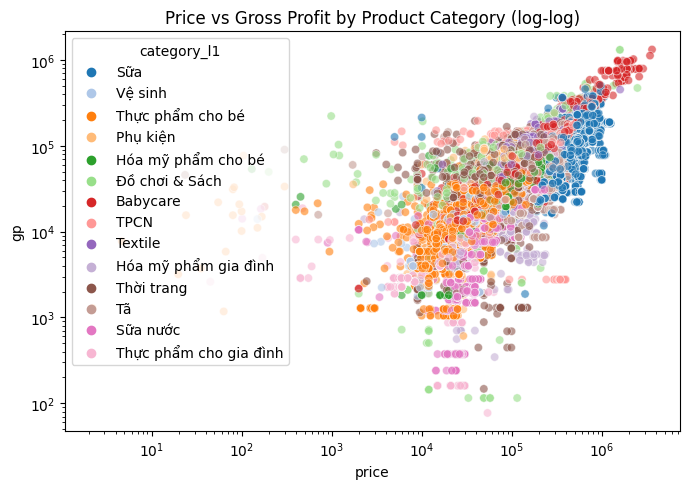

In [7]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_merged_full,
    x="price",
    y="gp",
    hue="category_l1",
    alpha=0.6,
    palette="tab20"
)
plt.xscale("log")
plt.yscale("log")
plt.title("Price vs Gross Profit by Product Category (log-log)")
plt.tight_layout()
plt.show()

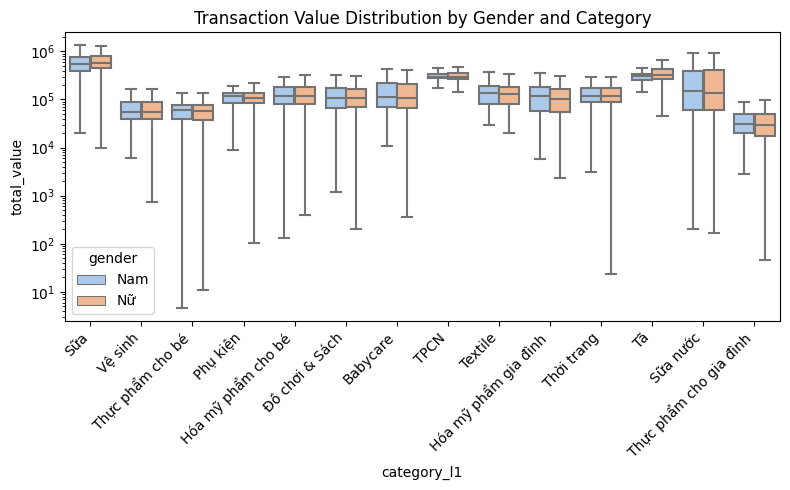

In [9]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=df_merged_full,
    x="category_l1",
    y="total_value",
    hue="gender",
    showfliers=False,
    palette="pastel"
)
plt.yscale("log")
plt.xticks(rotation=45, ha="right")
plt.title("Transaction Value Distribution by Gender and Category")
plt.tight_layout()
plt.show()


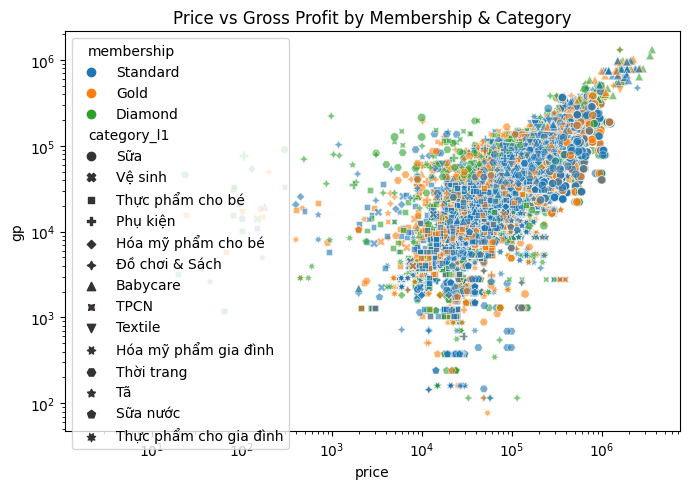

In [10]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df_merged_full,
    x="price",
    y="gp",
    hue="membership",
    style="category_l1",
    alpha=0.6,
    palette="tab10"
)
plt.xscale("log")
plt.yscale("log")
plt.title("Price vs Gross Profit by Membership & Category")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


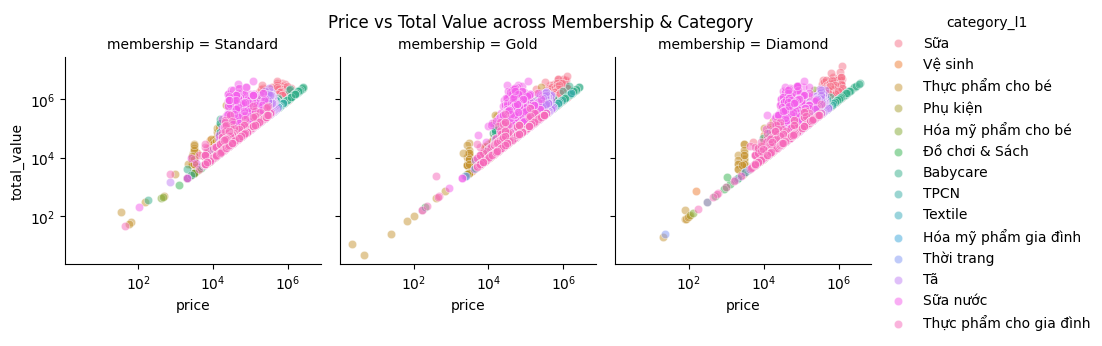

In [11]:
g = sns.FacetGrid(df_merged_full, col="membership", hue="category_l1", col_wrap=3, height=3)
g.map_dataframe(sns.scatterplot, x="price", y="total_value", alpha=0.5)
g.set(xscale="log", yscale="log")
g.add_legend()
g.fig.suptitle("Price vs Total Value across Membership & Category", y=1.03)
plt.show()

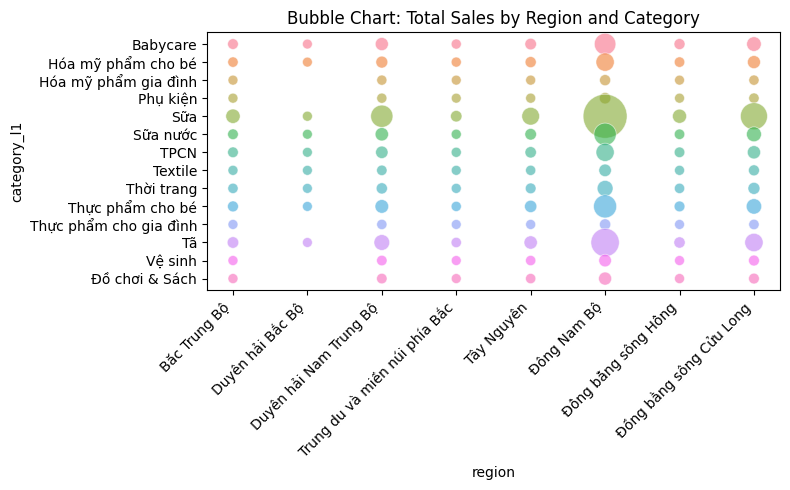

In [12]:
df_bubble = (
    df_merged_full.groupby(["region", "category_l1"])
    .agg(total_sales=("total_value", "sum"))
    .reset_index()
)

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_bubble,
    x="region",
    y="category_l1",
    size="total_sales",
    sizes=(50, 1000),
    alpha=0.6,
    hue="category_l1",
    legend=False
)
plt.xticks(rotation=45, ha="right")
plt.title("Bubble Chart: Total Sales by Region and Category")
plt.tight_layout()
plt.show()


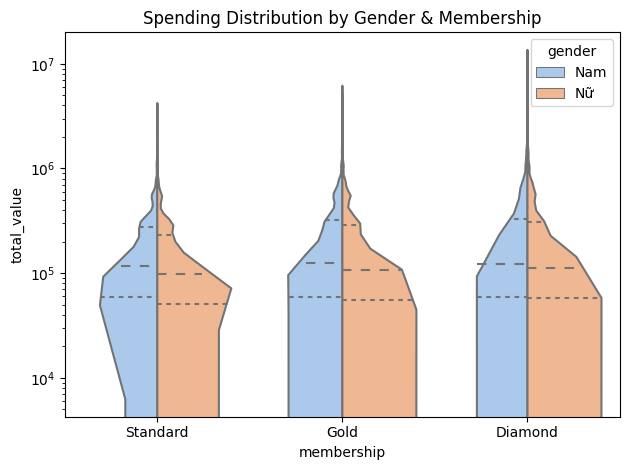

In [13]:
sns.violinplot(
    data=df_merged_full,
    x="membership",
    y="total_value",
    hue="gender",
    split=True,
    inner="quart",
    palette="pastel"
)
plt.yscale("log")
plt.title("Spending Distribution by Gender & Membership")
plt.tight_layout()
plt.show()
